In [45]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc, log_loss,mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

In [5]:
IMAGE_SIZE = (64, 64)

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['0', '1']:
        class_folder = os.path.join(folder, label)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, IMAGE_SIZE)
                img_flattened = img_resized.flatten()
                images.append(img_flattened)
                labels.append(int(label))
    return np.array(images), np.array(labels)

In [6]:
train_images, train_labels = load_images_from_folder('train')
test_images, test_labels = load_images_from_folder('test')

In [7]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (2372, 4096)
Training labels shape: (2372,)
Testing data shape: (336, 4096)
Testing labels shape: (336,)


In [8]:
train_images_scaled = train_images/255
train_images_scaled

array([[0.37647059, 0.46666667, 0.39607843, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2627451 , 0.25882353,
        0.41568627],
       [0.84313725, 0.74509804, 0.76470588, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
test_images_scaled = test_images/255
test_images_scaled

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.42352941, 0.43529412, 0.51764706, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69803922, 0.67058824, 0.67058824, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
pca = PCA(n_components=2)

In [11]:
train_images_reduced = pca.fit_transform(train_images)

In [12]:
train_images_reduced.shape

(2372, 2)

In [13]:
test_images_reduced = pca.fit_transform(test_images)

In [14]:
lr_model = LogisticRegression(max_iter=100, C=0.1)

In [15]:
lr_model.fit(train_images_reduced,train_labels)

LogisticRegression(C=0.1)

In [16]:
lr_pred = lr_model.predict(test_images_reduced)

In [17]:
accuracy_score(test_labels, lr_pred)

0.6190476190476191

In [50]:
print("Mean Absolute Error: ", mean_absolute_error(test_labels, lr_pred))
print("Mean Squared Error: ", mean_squared_error(test_labels,lr_pred))
print("Root Mean Squared Error: ", root_mean_squared_error(test_labels, lr_pred))


Mean Absolute Error:  0.38095238095238093
Mean Squared Error:  0.38095238095238093
Root Mean Squared Error:  0.6172133998483676


In [18]:
confusion_matrix(test_labels,lr_pred)

array([[208,   0],
       [128,   0]], dtype=int64)

In [19]:
print(classification_report(test_labels,lr_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       208
           1       0.00      0.00      0.00       128

    accuracy                           0.62       336
   macro avg       0.31      0.50      0.38       336
weighted avg       0.38      0.62      0.47       336



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

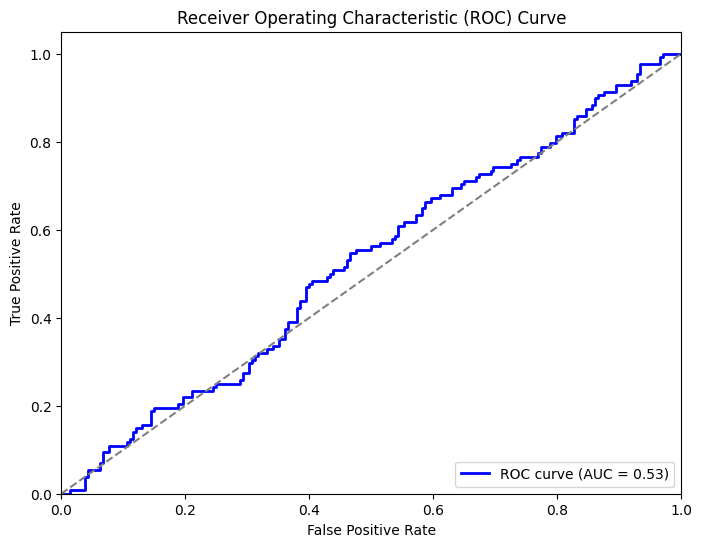

In [33]:

y_probs = lr_model.predict_proba(test_images_reduced)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=15)

In [23]:
knn_model.fit(train_images_reduced,train_labels)

KNeighborsClassifier(n_neighbors=15)

In [24]:
knn_pred = knn_model.predict(test_images_reduced)

In [25]:
accuracy_score(test_labels,knn_pred)

0.6130952380952381

In [52]:
print("Mean Absolute Error: ", mean_absolute_error(test_labels, knn_pred))
print("Mean Squared Error: ", mean_squared_error(test_labels,knn_pred))
print("Root Mean Squared Error: ", root_mean_squared_error(test_labels, knn_pred))

Mean Absolute Error:  0.3869047619047619
Mean Squared Error:  0.3869047619047619
Root Mean Squared Error:  0.6220166894101491


In [26]:
confusion_matrix(test_labels,knn_pred)

array([[199,   9],
       [121,   7]], dtype=int64)

In [27]:
print(classification_report(test_labels,knn_pred))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75       208
           1       0.44      0.05      0.10       128

    accuracy                           0.61       336
   macro avg       0.53      0.51      0.43       336
weighted avg       0.55      0.61      0.50       336



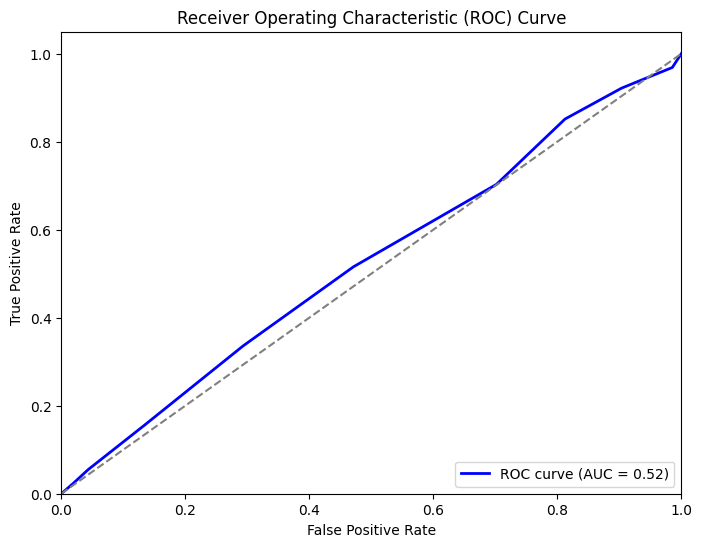

In [36]:
y_probs = knn_model.predict_proba(test_images_reduced)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

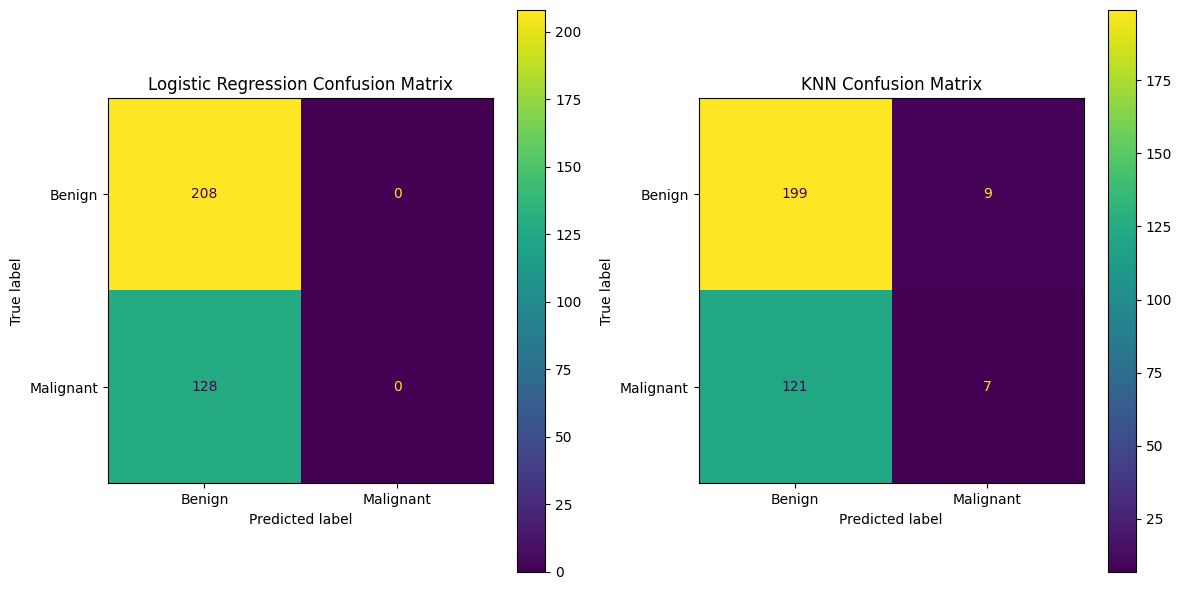

In [29]:
plt.figure(figsize=(12, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix(test_labels, lr_pred), display_labels=['Benign', 'Malignant']).plot(ax=plt.gca())
plt.title('Logistic Regression Confusion Matrix')

# KNN Confusion Matrix
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix(test_labels, knn_pred), display_labels=['Benign', 'Malignant']).plot(ax=plt.gca())
plt.title('KNN Confusion Matrix')

plt.tight_layout()
plt.show()


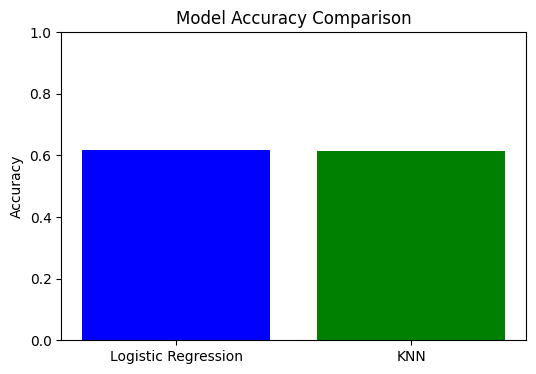

In [30]:
lr_accuracy = accuracy_score(test_labels, lr_pred)
knn_accuracy = accuracy_score(test_labels, knn_pred)
# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['Logistic Regression', 'KNN']
accuracies = [lr_accuracy, knn_accuracy]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


Sample Logistic Regression Predictions: 


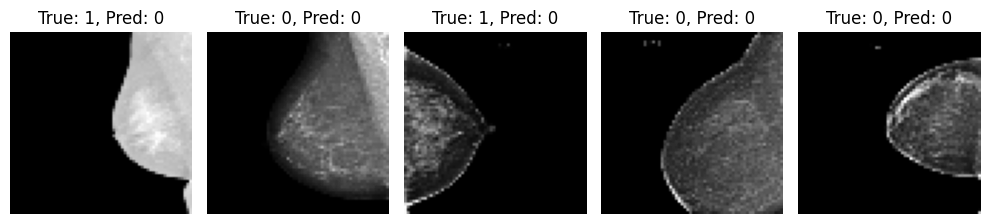

Sample KNN Classification Predictions: 


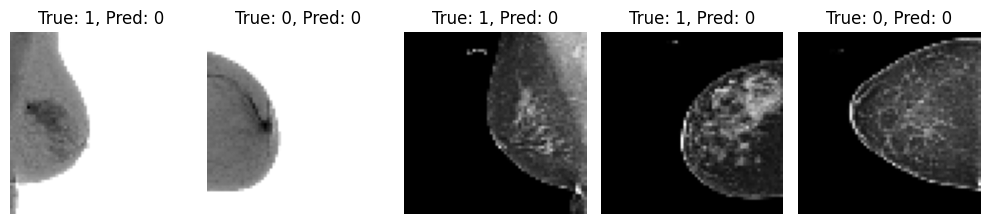

In [31]:
def display_sample_images(images, true_labels, pred_labels, n=5):
    plt.figure(figsize=(10,10))
    for i in range(n):
        index = np.random.randint(0,len(images))
        img = images[index].reshape(64,64)
        true_label = true_labels[index]
        pred_label = pred_labels[index]
        plt.subplot(1,n,i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample Logistic Regression Predictions: ")
display_sample_images(test_images,test_labels,lr_pred)

print("Sample KNN Classification Predictions: ")
display_sample_images(test_images,test_labels,knn_pred)